In [1]:
#name:Suhani Bade
#roll no:COBA34
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing

In [4]:
df = pd.read_csv("C:/Users/LENOVO/Desktop/data/emails.csv")

In [5]:
df.info

<bound method DataFrame.info of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrast

In [6]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [8]:
df.drop(columns=['Email No.'], inplace=True)
df.isna().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [9]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [12]:

X=df.iloc[:, :df.shape[1]-1] #independent Variables
y=df.iloc[:, -1] #Dependent Variable
X.shape, y.shape

((5172, 3000), (5172,))

In [13]:
df.dropna(how='any',inplace=True)

In [15]:
x=df.iloc[:, 1:-1].values
y=df.iloc[:,-1].values

In [17]:
from sklearn.model_selection import train_test_split

# Assuming x and y are your features and labels respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay

def report(classifier, x_test, y_test):
    y_pred = classifier.predict(x_test)

    # Confusion matrix
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

    # Accuracy, precision, and recall
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')

    # Precision-Recall Curve
    PrecisionRecallDisplay.from_estimator(classifier, x_test, y_test).plot()

    # ROC Curve
    RocCurveDisplay.from_estimator(classifier, x_test, y_test).plot()


In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
KNN=KNeighborsClassifier(n_neighbors=10) 
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

Accuracy: 0.871616395978345
Precision: 0.7702020202020202
Recall: 0.8026315789473685


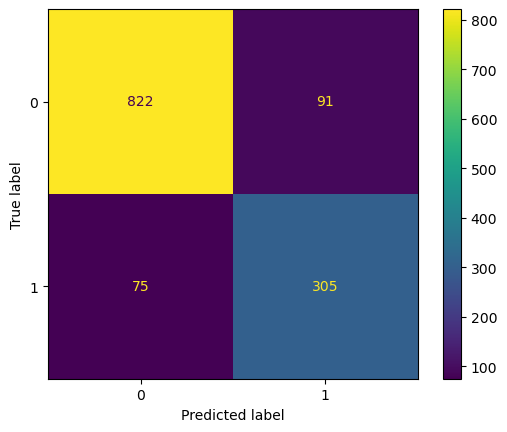

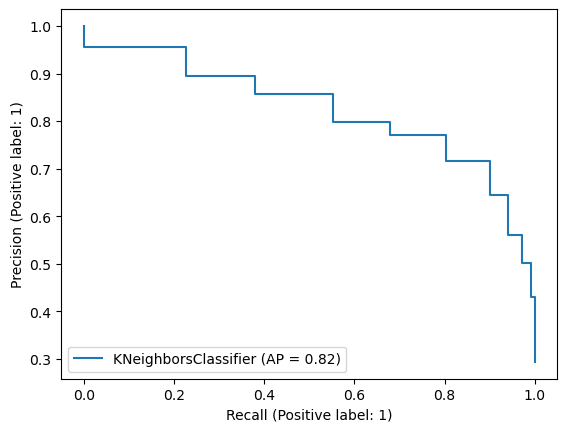

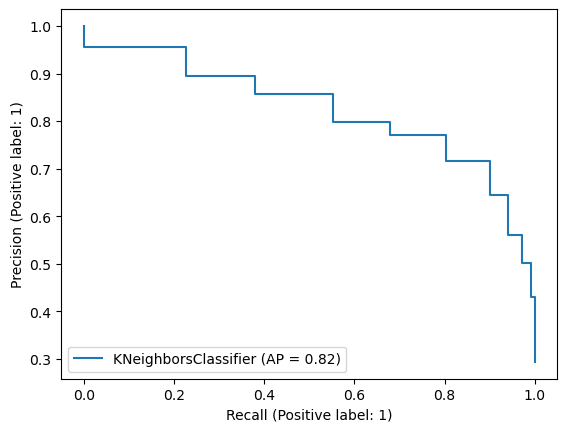

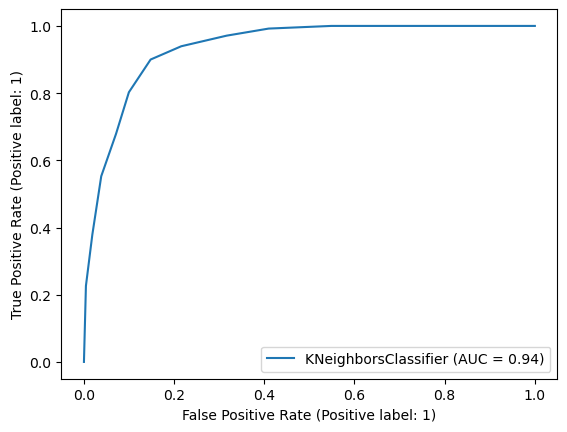

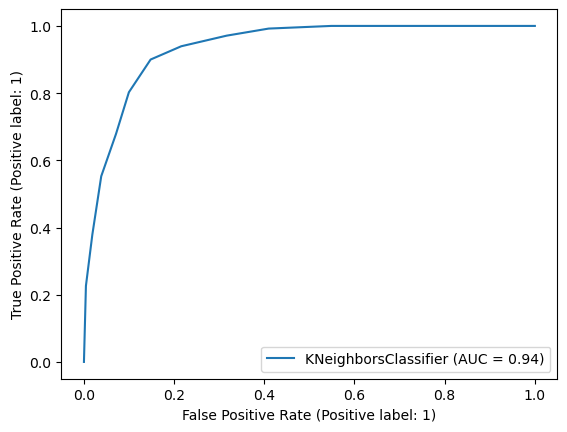

In [56]:
report(KNN,x_test,y_test)

In [57]:
from sklearn.svm import SVC 
svm = SVC(gamma='auto', random_state=10) 
svm.fit(x_train,y_train)

SVC(gamma='auto', random_state=10)

Accuracy: 0.8924980665119876
Precision: 0.8707692307692307
Recall: 0.7447368421052631


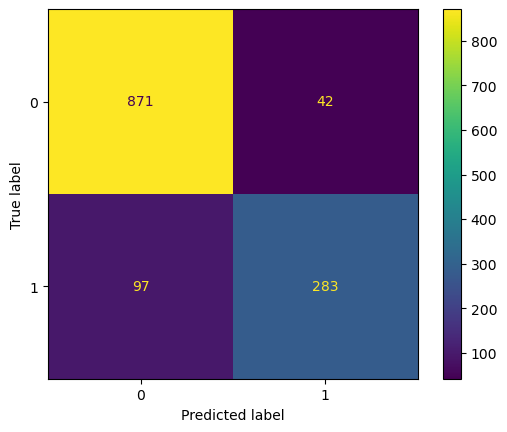

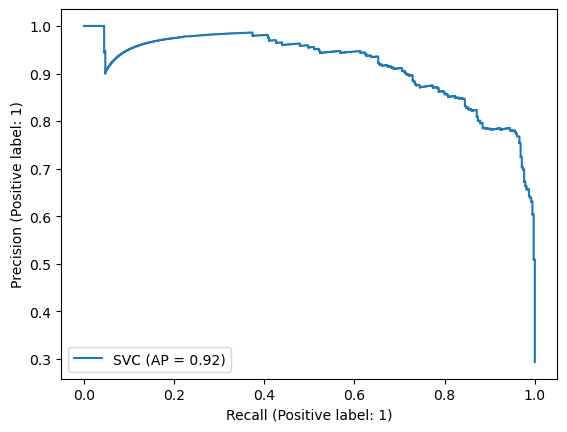

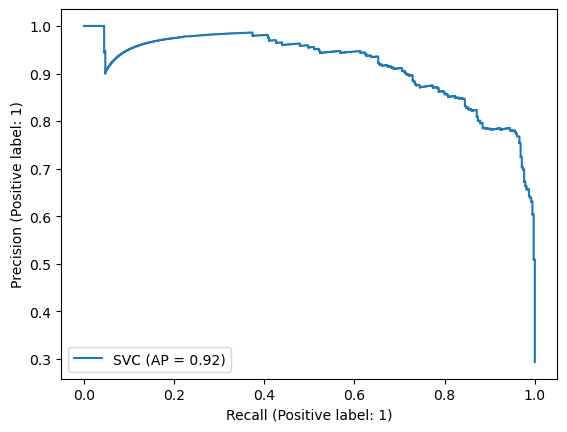

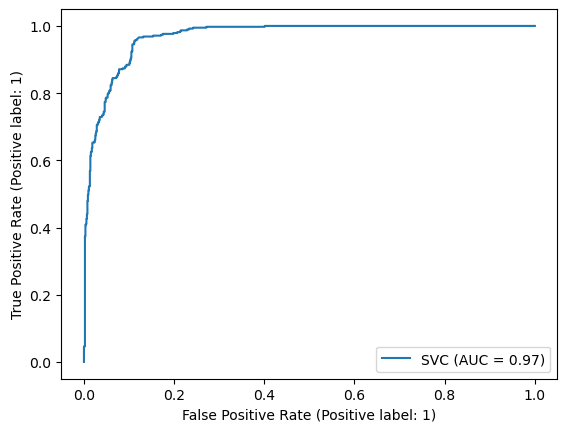

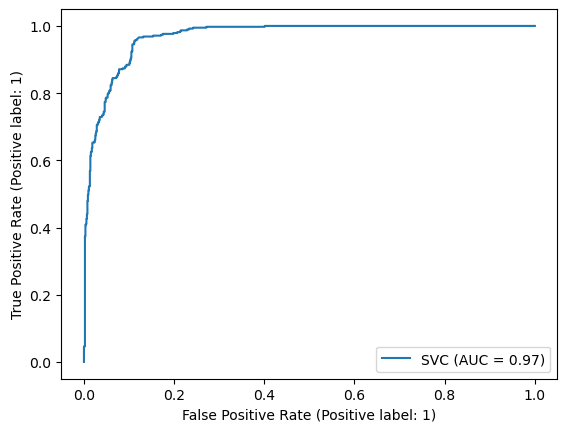

In [61]:
# Assuming you already have svm, x_test, and y_test defined
report(svm, x_test, y_test)
